# Analysis of most promenant algorithm

In this notebook I will document the search for best algrothm to analyse TransferMonitoring data

## Loading and initial setup

In [1]:
%matplotlib inline
# Here i keep prepared csv file for ML
f = open('/home/zygis/_Projektai/CERN/TransferMonitoring/Zygimantas/data/output/out120000.csv')

import numpy as np
import pandas as pd
from pandas import read_csv
from IPython.display import display, HTML

# in order to display of dataframe
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

dataframe = read_csv(f).astype(np.float32)

# to see struckture of data, uncoment
# dataframe 

# save headers to seperate list
original_headers = list(dataframe.columns.values)

## to see list of headeers, uncoment
# print(len(original_headers))
# display(original_headers)

# Preprocesing step
## Check if data is missing any value

In [2]:
# dataframe.isnull().any()

In [3]:
# -- uncoment to see data types
# types = dataframe.dtypes
# types


In [4]:
# try: 
#     # if true, dataframe contains infinite numbers(bad)     
#     print(np.all(np.isfinite(dataframe)))
# except:
#     pass

In [5]:
# try:    
#     print(np.any(np.isnan(dataframe)))
# except:
#     pass

Selecting importat features
---------

Since our datasets is quit big, we should reduce the values inorder to save resources and increase computational speed.

First we drop out unvanted columns that for sure will not tell anything important for us.

In [6]:
# fields that are output and can't be used as input
drop_list_output = ['tr_id','t_error_code','tr_timestamp_complete','timestamp_tr_st']
for el in drop_list_output:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))

# fields that are non vairiating and useless
drop_list_non_variate = ['block_size','buf_size','channel_type',
                            'dst_site_name','src_site_name','t_timeout','src_srm_v','tcp_buf_size']
for el in drop_list_non_variate:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))

# fields that correlating and useless        
drop_list_correlating =['file_metadata|name','file_metadata|dst_type',
                        'file_metadata|request_id','file_metadata|src_type',
                        'file_metadata|md5','file_metadata|src_rse',
                        'file_metadata|dst_rse','file_metadata|activity',
                        'file_metadata|scope','file_metadata|dest_rse_id']
for el in drop_list_correlating:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))


# a=list(dataframe.columns.values)

Removing rows with 'timestamp_tr_dlt' == -1
-----

In [7]:
from sklearn import preprocessing
dataframe = dataframe[dataframe.timestamp_tr_dlt != -1 ]
# dataframe


Now we pop out our target column, we will use it for later.

In [8]:
# from dataframe pop target column and transform to ndarray
target=dataframe.pop('timestamp_tr_dlt')

As an end result we will process this kind of matrix.

In [9]:
prepared_headers = list(dataframe.columns.values)
# prepared_headers

More checking on dataframe:

In [10]:
# corr = dataframe.corr().fillna(0).mul(100).astype(int)
corr = dataframe.corr().fillna(0).mul(100).astype(int)
# corr

Lets see corelation matrix, ploted
------

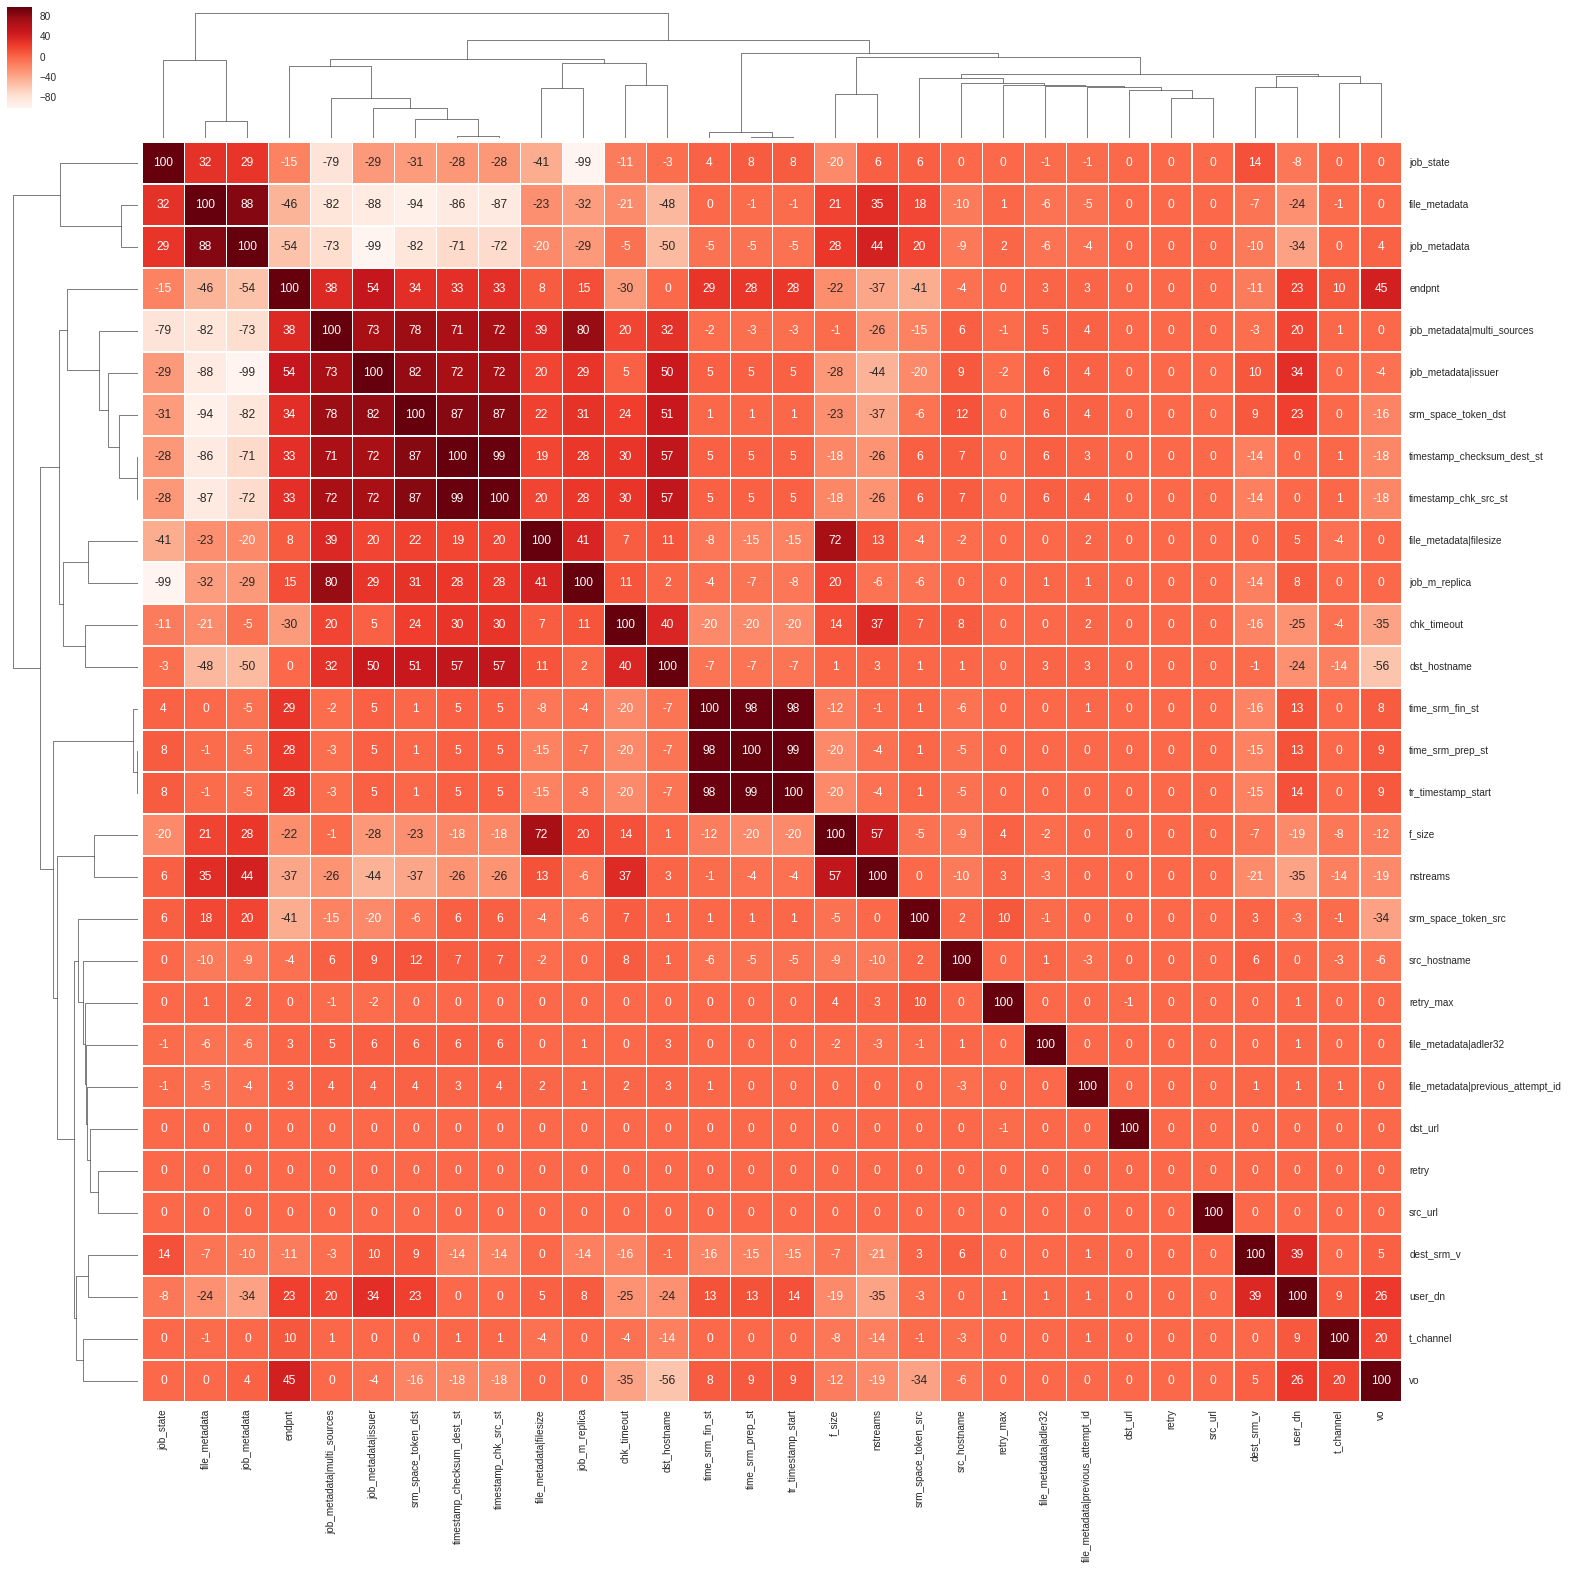

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# corr = pd.DataFrame(X_noVariance).corr().fillna(0).mul(100).astype(int)


cg = sns.clustermap(figsize=(25,25),data=corr, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt
sns.plt.show()

Trying scaling on data
------

In [12]:

matrix_to_scale = dataframe.as_matrix()
# matrix_to_scale

In [13]:
# scale_X = preprocessing.scale(matrix_to_scale)
# # type(matrix_to_scale)
# scale_X

#  scale between [0;1]
min_max_scaler = preprocessing.MinMaxScaler()
X_scalled = min_max_scaler.fit_transform(matrix_to_scale)
# X_scalled  

ML learning phase
-----

Now we are preparing to matrixes to for analysis by transforming them to ndarray. One will be data, another one will be our target:

In [14]:
X = X_scalled
y = target.as_matrix()

Just to be sure, lets see how prepared data looks:

In [15]:
# X

In [16]:
# y

In [17]:
import math
log_f= lambda x: math.log(x+2)
# log_f= lambda x: x

y = list(map(log_f,y))




GradientBoostingRegressor , n_estimators=10
----------------
First lets see how well RandomForestRegressor performs.

In [18]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(70031, 34494)

In [19]:
# Fit a Random Forest 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred)) 


In [20]:
# output=[]
# comparing real values to predicted
i = 0
for answ, pred in zip(y_test, y_pred):
    i +=1
    display ('{}=>{}'.format(answ,pred)) 
    if i > 100:
        break
# display(output[:100])

'5634.999999999999=>5992.910162317956'

'15213.000000000002=>5992.910162317956'

'113734.00000000009=>55921.073848074426'

'6968.999999999997=>6171.62918012064'

'1475.9999999999995=>5992.910162317956'

'4143.999999999999=>6171.62918012064'

'2790.0000000000005=>5992.910162317956'

'37441.00000000001=>34022.41797805294'

'4433.000000000004=>6171.62918012064'

'2241.9999999999995=>5992.910162317956'

'33893.00000000001=>28189.630243499643'

'2790.0000000000005=>6171.62918012064'

'2805.9999999999995=>6171.62918012064'

'4862.999999999995=>6171.62918012064'

'274628.00000000023=>75341.75805379591'

'6292.000000000002=>6171.62918012064'

'2822.999999999999=>5992.910162317956'

'11745.999999999995=>6741.842835428452'

'11032.0=>17282.058277007218'

'11601.999999999995=>10886.55238388943'

'2369.000000000001=>6171.62918012064'

'11720.99999999999=>28189.630243499643'

'6681.000000000001=>5992.910162317956'

'69642.99999999996=>58967.31699621765'

'56631.99999999999=>34022.41797805294'

'2584.0=>6171.62918012064'

'4766.999999999997=>6171.62918012064'

'216521.00000000003=>28189.630243499643'

'12177.000000000007=>17282.058277007218'

'740959.9999999997=>79445.88522231062'

'13609.000000000007=>8822.485028305247'

'233881.99999999983=>59928.51597911582'

'5513.000000000003=>6171.62918012064'

'2623.9999999999995=>6741.842835428452'

'5958.999999999998=>5992.910162317956'

'9357.999999999998=>6741.842835428452'

'9827.000000000005=>6741.842835428452'

'63714.99999999998=>25792.834907194276'

'28454.00000000001=>59928.51597911582'

'1307.0000000000005=>5992.910162317956'

'4514.000000000004=>5992.910162317956'

'2710.999999999999=>6741.842835428452'

'1245.0=>5992.910162317956'

'2434.999999999999=>5992.910162317956'

'1422.0000000000002=>6741.842835428452'

'3275.999999999998=>5992.910162317956'

'4618.999999999998=>5992.910162317956'

'11344.999999999993=>5992.910162317956'

'3002.9999999999977=>6171.62918012064'

'138621.00000000003=>58967.31699621765'

'248645.99999999997=>55921.073848074426'

'1898.9999999999993=>6171.62918012064'

'4880.999999999996=>6171.62918012064'

'635368.9999999997=>47980.61139229628'

'155781.0=>58967.31699621765'

'1416.0=>5992.910162317956'

'1220.0000000000005=>6171.62918012064'

'8132.0000000000055=>6741.842835428452'

'22019.000000000015=>6171.62918012064'

'4216.999999999998=>6171.62918012064'

'46580.00000000001=>25792.834907194276'

'703772.0000000005=>75341.75805379591'

'147374.00000000006=>75341.75805379591'

'45361.999999999985=>25792.834907194276'

'10237.000000000005=>11747.332980188483'

'9413.000000000002=>6171.62918012064'

'2477.0=>6741.842835428452'

'6708.000000000003=>5992.910162317956'

'223752.00000000006=>58967.31699621765'

'1274.0=>6741.842835428452'

'163275.99999999994=>75341.75805379591'

'25687.000000000004=>25792.834907194276'

'9294.999999999998=>6741.842835428452'

'1392.9999999999998=>5992.910162317956'

'7382.0000000000055=>6171.62918012064'

'1406.9999999999995=>5992.910162317956'

'37370.999999999985=>29241.686326622872'

'1639.0000000000005=>6171.62918012064'

'91774.99999999994=>55921.073848074426'

'496582.0000000002=>47980.61139229628'

'79995.0=>55921.073848074426'

'1740.0000000000005=>6171.62918012064'

'4344.0=>6171.62918012064'

'42444.00000000001=>25792.834907194276'

'1343.0000000000002=>5992.910162317956'

'137752.0000000001=>47980.61139229628'

'4046.000000000002=>5992.910162317956'

'39812.0=>59928.51597911582'

'34074.0=>8822.485028305247'

'587.9999999999998=>1910.8542339144408'

'1871.9999999999998=>5992.910162317956'

'1602.0000000000005=>5992.910162317956'

'26391.000000000004=>5992.910162317956'

'6272.000000000004=>5992.910162317956'

'10821.000000000002=>1910.8542339144408'

'7858.000000000002=>6741.842835428452'

'627137.0000000003=>70303.66109429389'

'9994.00000000001=>6171.62918012064'

'576.0000000000001=>1962.9592675060978'

'4320.999999999996=>6741.842835428452'

'11584.000000000005=>29839.13340706456'

Error rates of this model:

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 61758.41547774692
RMSE: 75577679457.8031


GradientBoostingRegressor , n_estimators=50
----------------

In [22]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(70031, 34494)

In [23]:
# Fit a Random Forest 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred)) 


In [24]:
# output=[]
# comparing real values to predicted
i = 0
for answ, pred in zip(y_test, y_pred):
    i +=1
    display ('{}=>{}'.format(answ,pred)) 
    if i > 100:
        break
# display(output[:100])

'5634.999999999999=>3291.4020899550505'

'15213.000000000002=>6252.53913892234'

'113734.00000000009=>124199.88159712333'

'6968.999999999997=>5104.130543236775'

'1475.9999999999995=>2559.1084084812787'

'4143.999999999999=>4970.381417983305'

'2790.0000000000005=>3105.0095761556563'

'37441.00000000001=>50685.4931696857'

'4433.000000000004=>4974.4691538127045'

'2241.9999999999995=>3242.8433028580516'

'33893.00000000001=>39831.0148015188'

'2790.0000000000005=>4334.996824619485'

'2805.9999999999995=>3333.381617831558'

'4862.999999999995=>5287.1105654903995'

'274628.00000000023=>194663.69367548724'

'6292.000000000002=>5079.947189493179'

'2822.999999999999=>3581.1998041062425'

'11745.999999999995=>7184.7620826949515'

'11032.0=>18060.442981139087'

'11601.999999999995=>9790.604248436483'

'2369.000000000001=>4385.269683021303'

'11720.99999999999=>38634.439182117014'

'6681.000000000001=>4963.954139470624'

'69642.99999999996=>147256.26074729185'

'56631.99999999999=>51428.53692439682'

'2584.0=>5043.490790869651'

'4766.999999999997=>5077.751205418573'

'216521.00000000003=>57288.02645868544'

'12177.000000000007=>18913.890650353424'

'740959.9999999997=>377839.92173384246'

'13609.000000000007=>9662.545591191547'

'233881.99999999983=>148572.49198566494'

'5513.000000000003=>5246.886317130805'

'2623.9999999999995=>7634.119852499046'

'5958.999999999998=>3079.373438914831'

'9357.999999999998=>7235.058388001109'

'9827.000000000005=>7528.6225038611665'

'63714.99999999998=>41546.013458066045'

'28454.00000000001=>103514.65595932295'

'1307.0000000000005=>4291.85448621048'

'4514.000000000004=>3888.6421183966713'

'2710.999999999999=>3530.855150650939'

'1245.0=>2592.027472456701'

'2434.999999999999=>3102.7835668600155'

'1422.0000000000002=>4217.072887841839'

'3275.999999999998=>3171.4969882276423'

'4618.999999999998=>3240.5938906653555'

'11344.999999999993=>3732.3608490446636'

'3002.9999999999977=>3420.4263141738084'

'138621.00000000003=>147256.26074729185'

'248645.99999999997=>157083.7036708542'

'1898.9999999999993=>3375.123237608579'

'4880.999999999996=>3700.3178325290173'

'635368.9999999997=>116120.64458631234'

'155781.0=>145593.35826109778'

'1416.0=>3078.938749087582'

'1220.0000000000005=>3903.1954210251224'

'8132.0000000000055=>9405.78887407683'

'22019.000000000015=>6748.608555126626'

'4216.999999999998=>4542.819861180283'

'46580.00000000001=>30797.990492189252'

'703772.0000000005=>157295.90525690065'

'147374.00000000006=>229794.8309766173'

'45361.999999999985=>35469.455977662314'

'10237.000000000005=>12610.211814794962'

'9413.000000000002=>4635.211660473564'

'2477.0=>6821.808177454539'

'6708.000000000003=>2929.4499581747573'

'223752.00000000006=>158569.4918471639'

'1274.0=>5617.553897256543'

'163275.99999999994=>155475.35316445'

'25687.000000000004=>35469.455977662314'

'9294.999999999998=>5908.442580299063'

'1392.9999999999998=>2893.459685449357'

'7382.0000000000055=>4338.752693330063'

'1406.9999999999995=>4050.2997021111514'

'37370.999999999985=>58297.48105952083'

'1639.0000000000005=>5259.144335646157'

'91774.99999999994=>126030.18893369965'

'496582.0000000002=>130057.17399556105'

'79995.0=>101622.21550000971'

'1740.0000000000005=>4357.885985058288'

'4344.0=>4006.08193357516'

'42444.00000000001=>29753.35881336179'

'1343.0000000000002=>3614.6669766026853'

'137752.0000000001=>85789.75414772083'

'4046.000000000002=>3244.207161551256'

'39812.0=>117196.2600448589'

'34074.0=>12837.777713429647'

'587.9999999999998=>747.5941222734106'

'1871.9999999999998=>3102.7835668600155'

'1602.0000000000005=>5110.208662986516'

'26391.000000000004=>4106.831282918161'

'6272.000000000004=>6096.734186427366'

'10821.000000000002=>767.1565592684441'

'7858.000000000002=>6241.761032274304'

'627137.0000000003=>172137.65016214066'

'9994.00000000001=>4836.721907933449'

'576.0000000000001=>788.1079353050345'

'4320.999999999996=>6199.173024229623'

'11584.000000000005=>44265.7379579952'

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 46816.37260026786
RMSE: 38346776738.264786


GradientBoostingRegressor , n_estimators=100
----------------

In [34]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(70031, 34494)

In [35]:
# Fit a Random Forest 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred)) 


In [36]:
# output=[]
# comparing real values to predicted
i = 0
for answ, pred in zip(y_test, y_pred):
    i +=1
    display ('{}=>{}'.format(answ,pred)) 
    if i > 100:
        break
# display(output[:100])

'5634.999999999999=>3352.0296973711074'

'15213.000000000002=>6805.775624482116'

'113734.00000000009=>142769.7827897798'

'6968.999999999997=>4820.8736204210745'

'1475.9999999999995=>2273.7810214009364'

'4143.999999999999=>4924.183817065867'

'2790.0000000000005=>2880.8099431927317'

'37441.00000000001=>50566.42852639207'

'4433.000000000004=>4751.151939960401'

'2241.9999999999995=>3570.4083414710467'

'33893.00000000001=>31117.82525420615'

'2790.0000000000005=>3873.006137148622'

'2805.9999999999995=>2864.9651234778057'

'4862.999999999995=>5426.942592254694'

'274628.00000000023=>169931.4114625012'

'6292.000000000002=>5189.400776725187'

'2822.999999999999=>3370.1089647294048'

'11745.999999999995=>8146.592660121085'

'11032.0=>16597.368134480927'

'11601.999999999995=>10276.335649882614'

'2369.000000000001=>4119.105200950047'

'11720.99999999999=>31970.985279835786'

'6681.000000000001=>5696.637145382482'

'69642.99999999996=>151839.61922433737'

'56631.99999999999=>49365.23496478804'

'2584.0=>5059.244751944081'

'4766.999999999997=>5081.570874938737'

'216521.00000000003=>61265.16081141419'

'12177.000000000007=>17443.415855902913'

'740959.9999999997=>349443.47372319363'

'13609.000000000007=>10124.763902419325'

'233881.99999999983=>145338.44532680765'

'5513.000000000003=>5319.0563154953625'

'2623.9999999999995=>8051.742109088643'

'5958.999999999998=>2728.9444010927814'

'9357.999999999998=>7487.346588780135'

'9827.000000000005=>8011.711742174521'

'63714.99999999998=>40902.65127713107'

'28454.00000000001=>99705.51342004526'

'1307.0000000000005=>3750.7993979384346'

'4514.000000000004=>4248.462212758324'

'2710.999999999999=>2965.469066626167'

'1245.0=>2994.956003798448'

'2434.999999999999=>2978.0105397352136'

'1422.0000000000002=>3250.0738590775522'

'3275.999999999998=>2916.762793083293'

'4618.999999999998=>3011.9083246127243'

'11344.999999999993=>3985.0572799454744'

'3002.9999999999977=>2975.7319453602295'

'138621.00000000003=>152927.60918202685'

'248645.99999999997=>160003.72918775142'

'1898.9999999999993=>2936.315342655678'

'4880.999999999996=>3204.7561172951064'

'635368.9999999997=>145334.65167900012'

'155781.0=>156722.8446188098'

'1416.0=>3079.38452190728'

'1220.0000000000005=>3337.394265727494'

'8132.0000000000055=>10273.320485851937'

'22019.000000000015=>8422.465202663769'

'4216.999999999998=>4439.679045698465'

'46580.00000000001=>33544.45532091267'

'703772.0000000005=>156072.03035211726'

'147374.00000000006=>234927.01690320458'

'45361.999999999985=>34105.70332862919'

'10237.000000000005=>12757.632536695137'

'9413.000000000002=>5116.878625728151'

'2477.0=>7272.748536085252'

'6708.000000000003=>2669.9500435041787'

'223752.00000000006=>171306.51237463654'

'1274.0=>4319.9166563704775'

'163275.99999999994=>141347.11418551562'

'25687.000000000004=>34105.70332862919'

'9294.999999999998=>6802.810370412062'

'1392.9999999999998=>2923.328479740423'

'7382.0000000000055=>3883.779852915011'

'1406.9999999999995=>3562.0620161519164'

'37370.999999999985=>66036.23163551437'

'1639.0000000000005=>5039.700831650983'

'91774.99999999994=>132108.8662611248'

'496582.0000000002=>152372.570653887'

'79995.0=>99178.0099630419'

'1740.0000000000005=>3404.191840093987'

'4344.0=>3505.891082247532'

'42444.00000000001=>35040.88952566205'

'1343.0000000000002=>3306.1116997062604'

'137752.0000000001=>85485.25182803422'

'4046.000000000002=>2615.5161933181603'

'39812.0=>114072.44254472735'

'34074.0=>14934.379300511082'

'587.9999999999998=>714.6219966626569'

'1871.9999999999998=>2978.0105397352136'

'1602.0000000000005=>4599.889797751077'

'26391.000000000004=>5222.512592119602'

'6272.000000000004=>7204.930947830072'

'10821.000000000002=>726.0216266474382'

'7858.000000000002=>6728.3469746589035'

'627137.0000000003=>176861.27261300004'

'9994.00000000001=>4720.127663991724'

'576.0000000000001=>756.0360325033417'

'4320.999999999996=>7755.250056240842'

'11584.000000000005=>43710.96508540919'

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 41596.11236189139
RMSE: 31040165105.630745


GradientBoostingRegressor , n_estimators=200
----------------

In [38]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(70031, 34494)

In [39]:
# Fit a Random Forest 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred)) 


In [40]:
# output=[]
# comparing real values to predicted
i = 0
for answ, pred in zip(y_test, y_pred):
    i +=1
    display ('{}=>{}'.format(answ,pred)) 
    if i > 100:
        break
# display(output[:100])

'5634.999999999999=>3167.328672176801'

'15213.000000000002=>8839.008120615703'

'113734.00000000009=>133279.73890614725'

'6968.999999999997=>5657.525062776953'

'1475.9999999999995=>2034.5173488799812'

'4143.999999999999=>4923.570571914593'

'2790.0000000000005=>2852.8067221326137'

'37441.00000000001=>46289.207352740654'

'4433.000000000004=>5226.86349363303'

'2241.9999999999995=>3525.1530619224327'

'33893.00000000001=>25125.7077438952'

'2790.0000000000005=>3657.710768155222'

'2805.9999999999995=>2863.9609384573946'

'4862.999999999995=>5146.612864118446'

'274628.00000000023=>148156.91212602225'

'6292.000000000002=>6683.779598730373'

'2822.999999999999=>3437.114448715053'

'11745.999999999995=>9335.286510342494'

'11032.0=>15197.696651222794'

'11601.999999999995=>11096.041596617493'

'2369.000000000001=>4348.137949261684'

'11720.99999999999=>27185.396352848198'

'6681.000000000001=>6190.564803564949'

'69642.99999999996=>151172.56307916064'

'56631.99999999999=>46012.73527751387'

'2584.0=>4822.610891299779'

'4766.999999999997=>5000.457330562282'

'216521.00000000003=>66070.28659889915'

'12177.000000000007=>16542.852592958618'

'740959.9999999997=>429057.4461100408'

'13609.000000000007=>9777.012586919398'

'233881.99999999983=>161591.0974304124'

'5513.000000000003=>5044.297420006475'

'2623.9999999999995=>7761.269576530416'

'5958.999999999998=>2774.7953509625713'

'9357.999999999998=>7568.661605190108'

'9827.000000000005=>8638.283204541032'

'63714.99999999998=>42355.26076905811'

'28454.00000000001=>85231.89214057612'

'1307.0000000000005=>3431.1101470980243'

'4514.000000000004=>4939.021130074586'

'2710.999999999999=>2999.538078588308'

'1245.0=>2651.6358546354368'

'2434.999999999999=>2862.017333437818'

'1422.0000000000002=>2304.219395733933'

'3275.999999999998=>2864.2956199321798'

'4618.999999999998=>3025.180332518221'

'11344.999999999993=>4502.004126196112'

'3002.9999999999977=>2970.5931675149754'

'138621.00000000003=>161431.54534776884'

'248645.99999999997=>172884.40778964522'

'1898.9999999999993=>2920.33918397088'

'4880.999999999996=>3072.0345935924884'

'635368.9999999997=>266396.5897485105'

'155781.0=>173252.16958810552'

'1416.0=>2984.185247176833'

'1220.0000000000005=>3293.223096108169'

'8132.0000000000055=>11091.088751480667'

'22019.000000000015=>8585.911142970039'

'4216.999999999998=>4429.252746321115'

'46580.00000000001=>33242.750931246504'

'703772.0000000005=>235436.4995545429'

'147374.00000000006=>217401.73050250014'

'45361.999999999985=>36679.59501928385'

'10237.000000000005=>12920.009268298121'

'9413.000000000002=>5551.335097874996'

'2477.0=>7160.347046319457'

'6708.000000000003=>2795.4207438123663'

'223752.00000000006=>189373.93543020956'

'1274.0=>3222.800869709523'

'163275.99999999994=>108970.49856873155'

'25687.000000000004=>32680.544172459377'

'9294.999999999998=>7017.701879746278'

'1392.9999999999998=>2678.5637268744663'

'7382.0000000000055=>3773.779090996029'

'1406.9999999999995=>3305.1518924519605'

'37370.999999999985=>68172.74384186618'

'1639.0000000000005=>5292.548778235163'

'91774.99999999994=>128553.62586404031'

'496582.0000000002=>217766.6607363837'

'79995.0=>80098.31489803975'

'1740.0000000000005=>2962.3113679730113'

'4344.0=>3705.160990934564'

'42444.00000000001=>30865.50410313734'

'1343.0000000000002=>3140.181678431266'

'137752.0000000001=>81134.9940433445'

'4046.000000000002=>2502.1409090354546'

'39812.0=>96010.62386215129'

'34074.0=>15989.442810989185'

'587.9999999999998=>718.760040450505'

'1871.9999999999998=>3032.7858770278626'

'1602.0000000000005=>3961.702683476317'

'26391.000000000004=>6862.974534764975'

'6272.000000000004=>7959.4191881202805'

'10821.000000000002=>727.2205720740492'

'7858.000000000002=>7105.3017446450085'

'627137.0000000003=>199699.898916989'

'9994.00000000001=>4866.300193969001'

'576.0000000000001=>717.8867887640132'

'4320.999999999996=>7578.517117003448'

'11584.000000000005=>42397.13583075503'

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 36663.69244948678
RMSE: 55927493681.5906




Resources
-------
- http://stackoverflow.com/questions/11023411/how-to-import-csv-data-file-into-scikit-learn
- http://pandas.pydata.org/
- http://scikit-learn.org/stable/modules/scaling_strategies.html
- http://stackoverflow.com/questions/9590114/importance-of-pca-or-svd-in-machine-learning
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
- http://stackoverflow.com/questions/29298973/removing-features-with-low-variance-scikit-learn